# Feature Engineering

### Name: Miles McCain

This lab has two parts, [classification](#Feature-Engineering:-Classification) and [regression](#Feature-Engineering:-Regression).

## Feature Engineering: Classification

Load up `classification_exercises.csv`.  That dataset has 5 classification datasets inside of it, they should be clear from the column names.  For the first three, determine the features to add in order to best fit the data.  You'll know you've got it when the boundary is drawn appropriately.  Refer back to examples in the Polynomial Regression notebook for help.  The final two exercises are ungraded bonuses.  I imagine most people will skip them, but feel free to try to take on the challenge!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("classification_exercises.csv")
data.head()

,Unnamed: 0,x_a1,x_a2,y_a,X_b1,X_b2,y_b,X_c1,X_c2,y_c,X_bonus1,X_bonus2,y_bonus,X_otherbonus1,X_otherbonus2,y_otherbonus
0,0,-1.211120,-1.298578,0,0.875489,0.000982,1,0.712428,-0.543703,1,2.400049,0.000982,1,-0.336619,-0.511577,1
1,1,-0.302356,-0.383873,0,-0.535927,-0.694028,1,0.100214,0.123386,1,0.585127,-0.694028,1,0.511056,-0.667005,0
2,2,0.292731,1.125287,1,0.884205,-0.655863,0,0.968032,-0.695576,1,2.421059,-0.655863,0,0.654773,-0.418236,0
3,3,1.507676,1.363869,1,-0.096443,-0.934155,0,1.456700,-0.710133,1,0.908062,-0.934155,0,-0.507675,-0.285552,1
4,4,-0.646882,2.775098,1,-1.008296,0.188571,0,0.362917,0.763035,1,0.364840,0.188571,0,0.063443,0.782734,0


### Boilerplate Code

In [3]:
# Thank you, Dr. Z!

def scatter_with_decision(original_x, original_y, original_z, model, rules=None):
    """ Create a scatter plot for 2-dimensional input data, as well as the decision 
    boundary for the given logistic regression model. 
    
    parameters:
        original_x, original_y, original_z: numpy arrays
            the data for the two input dimensions (x and y) and output (z, with values 0 or 1)
        model: sklearn.linear_model.LogisticRegression
            the already-fit model
        rules: List[(index, function)]
            A collection of functions defining how to turn the original 
            columns into your engineered columns.  The index is either `0` or `1` 
            to indicate that the rule is applied to column 0 or 1, or `2` if 
            the rule uses both columns.
            Some examples:
                if you want `original_x**2`, your `rules` should contain the tuple `(0, lambda x: x**2)`.  
                if you want `original_y**3`, your `rules` should contain the tuple `(1, lambda x: x**3)`.
                if you want `original_x * original_y`, your `rules` should contain the tuple `(2, lambda x, y: x*y)`.
    returns:
        the Figure and Axes objects produced (in order to add more to it if you want, 
            e.g. title and axis labels)
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ### create the decision surface
    x = np.arange(original_x.min(), original_x.max(), 0.1)
    y = np.arange(original_y.min(), original_y.max(), 0.1)
    xx, yy = np.meshgrid(x, y)                       # this is its xy-coordinate grid

    ### We need to "ravel" the grid's matrices to make them one long column
    grid_as_columns =[xx.ravel(), yy.ravel()]
    if rules:
        for i, rule in rules:
            if i < 2:
                # this rule uses only one input column
                grid_as_columns.append(rule(grid_as_columns[i]))    
            else:
                # this rule uses both input columns
                grid_as_columns.append(rule(grid_as_columns[0], grid_as_columns[1]))
    dataset_cols = np.array(grid_as_columns).T       # now we have all the points in the grid as a long (_)x2 array 

    ### Now we can feed them into the prediction function and reshape it back to the grid
    zz_col = model.predict_proba(dataset_cols).T[0]
    zz = zz_col.reshape(xx.shape)                    # finally, we have the z-coordinates for each grid point

    # make the plots
    ax.contour(xx, yy, zz, levels=[.5], colors=['c'])
    ax.scatter(original_x, original_y, c=original_z)
    return fig, ax

### Dataset A

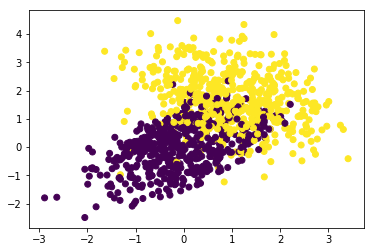

In [4]:
plt.scatter(data['x_a1'], data['x_a2'], c=data['y_a'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23d55fa4e0>)

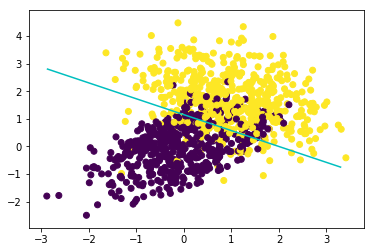

In [5]:
regression_a = LogisticRegression()
regression_a.fit(data[['x_a1', 'x_a2']], data['y_a'])
scatter_with_decision(data['x_a1'], data['x_a2'], data['y_a'], regression_a)

### Dataset B

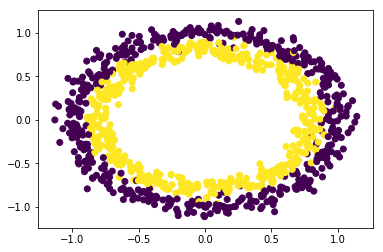

In [6]:
plt.scatter(data['X_b1'], data['X_b2'], c=data['y_b'])

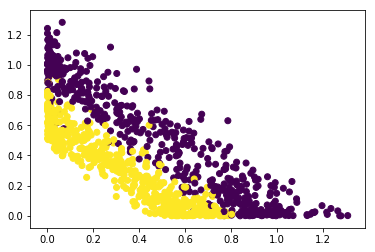

In [7]:
data['X_b1_2'] = data['X_b1'] ** 2
data['X_b2_2'] = data['X_b2'] ** 2
plt.scatter(data['X_b1_2'], data['X_b2_2'], c=data['y_b'])

I won't show the linear form of the other datasets to save space, but this _is_ very neat.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23c6741160>)

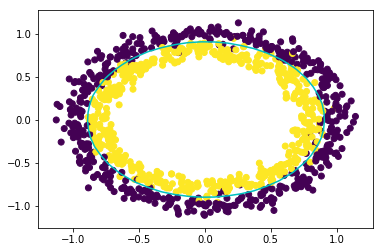

In [8]:
regression_b = LogisticRegression()
regression_b.fit(data[['X_b1', 'X_b2', 'X_b1_2', 'X_b2_2']], data['y_b'])
scatter_with_decision(data['X_b1'], data['X_b2'], data['y_b'], regression_b, rules=[(0, lambda k: k**2), (1, lambda k: k**2)])

### Dataset C

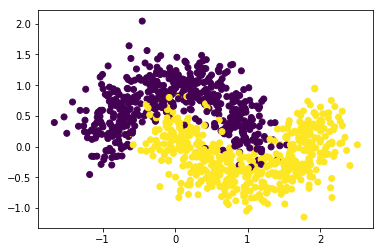

In [9]:
plt.scatter(data['X_c1'], data['X_c2'], c=data['y_c'])

It looks like this data could be split effectively by a nice polynomial of degree three...

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23c4e72b70>)

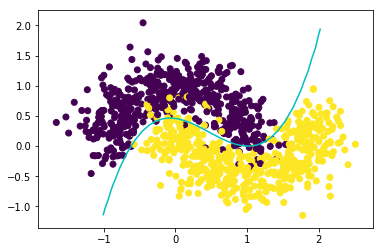

In [10]:
data['X_c1_3'] = data['X_c1']**3
data['X_c1_2'] = data['X_c1']**2
regression_b = LogisticRegression()
regression_b.fit(data[['X_c1', 'X_c2', 'X_c1_3', 'X_c1_2']], data['y_c'])
scatter_with_decision(data['X_c1'], data['X_c2'], data['y_c'], regression_b, rules=[(0, lambda k: k**3), (0, lambda k: k**2)])

### Bonus 1

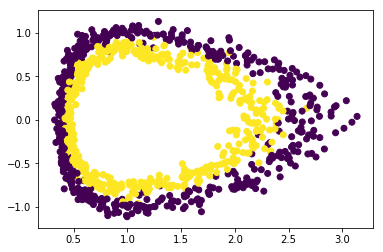

In [11]:
plt.scatter(data['X_bonus1'], data['X_bonus2'], c=data['y_bonus'])

Looks like an egg on its side. Also looks logarithmic. If we can turn it into a circle-like thing, we can square it and then we're golden.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23c4da7710>)

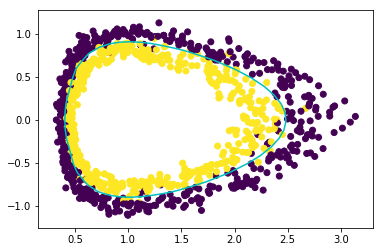

In [12]:
op1 = lambda k: np.log(k)**2
op2 = lambda k: k**2
data['X_bonus1_t'] = data['X_bonus1'].apply(op1)
data['X_bonus2_t'] = data['X_bonus2'].apply(op2)
regression_bonus = LogisticRegression()
regression_bonus.fit(data[['X_bonus1', 'X_bonus2', 'X_bonus1_t', 'X_bonus2_t']], data['y_bonus'])
scatter_with_decision(data['X_bonus1'], data['X_bonus2'], data['y_bonus'], regression_bonus, rules=[(0, op1), (1, op2)])

### Bonus 2

(Sorry—this is an inelegant solution.)

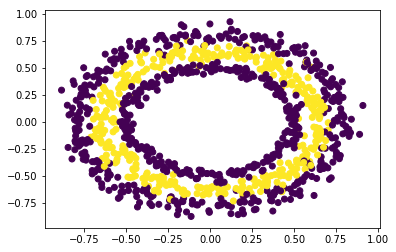

In [13]:
plt.scatter(data['X_otherbonus1'], data['X_otherbonus2'], c=data['y_otherbonus'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23c4d5fb38>)

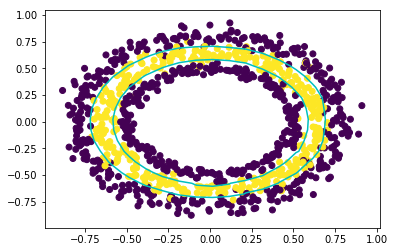

In [14]:
data['X_otherbonus_t'] = np.abs(np.sqrt(data['X_otherbonus1']**2 + data['X_otherbonus2']**2) - 0.65)
# hacks; not as elegant as the others
# plt.scatter(data['X_otherbonus_t'], data['X_otherbonus2'], c=data['y_otherbonus'])
regression_otherbonus = LogisticRegression()
regression_otherbonus.fit(data[['X_otherbonus1', 'X_otherbonus2', 'X_otherbonus_t']], data['y_otherbonus'])
scatter_with_decision(data['X_otherbonus1'], data['X_otherbonus2'], data['y_otherbonus'], regression_otherbonus, rules=[(2, lambda x, y: np.abs(np.sqrt(x**2 + y**2) - 0.65))])

## Feature Engineering: Regression

I now want you to load up `autos.csv`.  This is a single dataset; you may recognize it from the Datasets and Data Types notebook.  The goal here is to create a regression with horsepower as the response.  For now, only use numerical columns as your features.  Specifically, you are to do the following:

1. Create a linear regression model with all the numerical features.  Determine its training **root mean squared error**: 
$$ RMSE = \sqrt{\dfrac{\sum_{i=1}^n(y_i - {\widehat{y}_i)^2}}{n}}$$ 
2. Plot scatter plots of each numerical feature against the response.  Are there any that seem to be non-linearly related?  If so, add those engineered features.  Refit a second model with these new features added, and compare to the first model in terms of RMSE.  
3. Using the "medians for the other values" trick found in the Polynomial Regression notebook, plot your "surface" as it intersects in the scatterplots you made.

In [15]:
auto = pd.read_csv("auto.csv")
auto.dropna(inplace=True)

In [16]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [17]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [18]:
auto.rename(columns={col: col.strip() for col in auto.columns}, inplace=True)

In [19]:
auto_features = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']
auto_regression = LinearRegression()
auto_regression.fit(auto[auto_features], auto['horsepower'])
math.sqrt(mean_squared_error(auto['horsepower'], auto_regression.predict(auto[auto_features])))

12.539701069533274

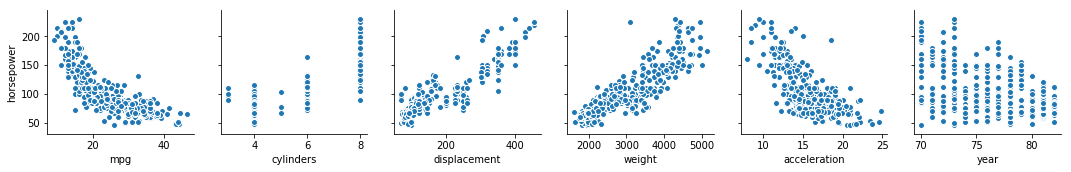

In [20]:
sns.pairplot(auto[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'horsepower']], x_vars=['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year'], y_vars=['horsepower'])

Looks like `mpg` is the only one not linear. Let's do something about that.

In [21]:
auto['mpg_reciprocal'] = auto['mpg'] ** -1

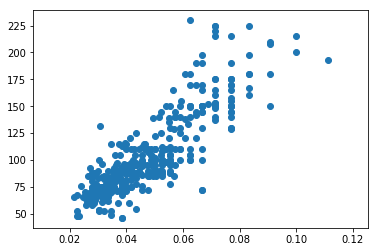

In [22]:
plt.scatter(auto['mpg_reciprocal'], auto['horsepower'])

That looks linear!

In [23]:
auto_features.append('mpg_reciprocal')
auto_regression_improved = LinearRegression()
auto_regression_improved.fit(auto[auto_features], auto['horsepower'])
math.sqrt(mean_squared_error(auto['horsepower'], auto_regression_improved.predict(auto[auto_features])))

11.911497931320023

Well, that's _slightly_ better. Success!

Now it's time to do our best to visualize our model.

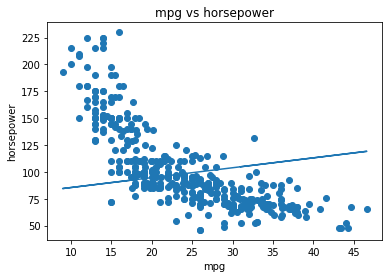

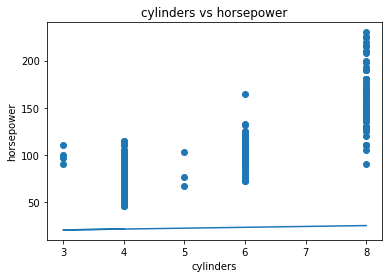

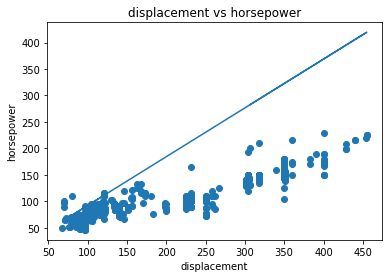

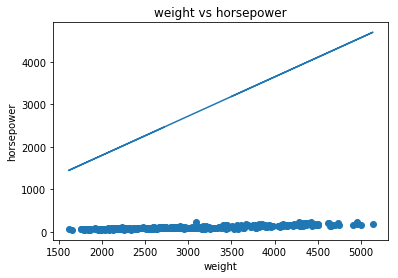

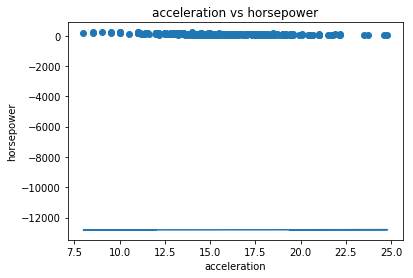

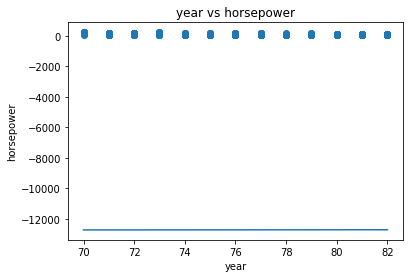

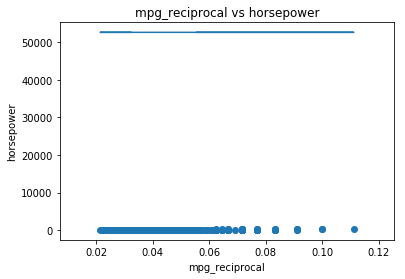

In [24]:
medians = {column: auto[column].median() for column in auto_features}
for column in auto_features:
    plt.scatter(auto[column], auto['horsepower'])
    plt.title(column + ' vs horsepower')
    plt.xlabel(column)
    plt.ylabel('horsepower')
    predictor_data = pd.DataFrame()
    predictor_data[column] = auto[column]
    for other_column in auto_features:
        if other_column == column:
            continue
        predictor_data[other_column] = [medians[other_column]] * len(auto[column])
    plt.plot(auto[column], auto_regression_improved.predict(predictor_data))
    plt.show()

Evidently, that's not a great way to visualize the fits. Something with the median must be throwing it off. I'm going to try something not specified in the assignment description, but which may give us a better look at the fit. Let's look at the residuals—and let's keep in mind that each feature plot is just one 'angle' from which we're looking at the same residual plot.

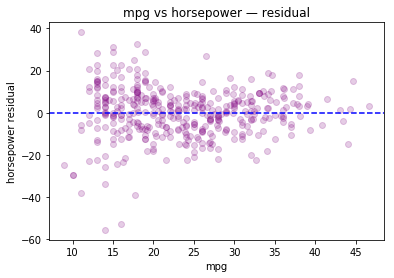

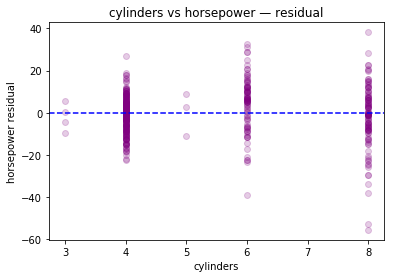

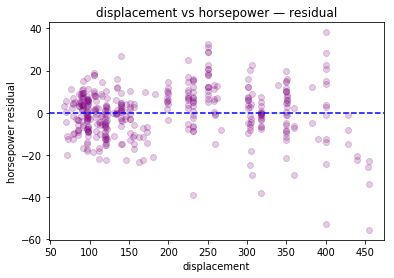

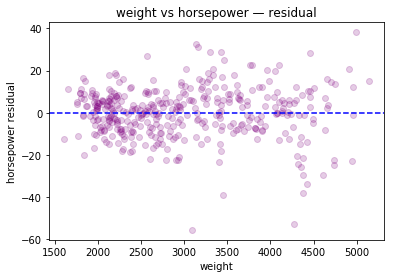

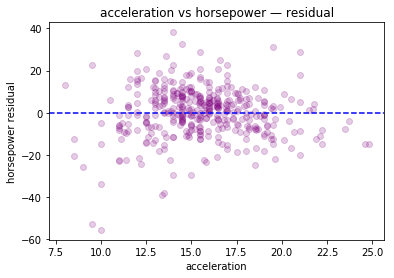

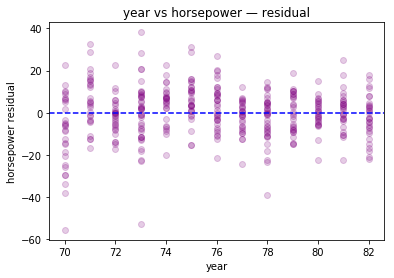

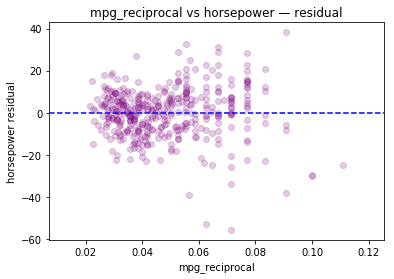

In [25]:
for column in auto_features:
    predictions = auto_regression_improved.predict(auto[auto_features])
    real_values = auto['horsepower']
    plt.scatter(auto[column], predictions - real_values, alpha=0.2, c='purple')
    plt.axhline(0, color='blue', linestyle="--")
    plt.title(column + ' vs horsepower — residual')
    plt.xlabel(column)
    plt.ylabel('horsepower residual')
    plt.show()

# Test/Train Split

In [80]:
from sklearn.model_selection import train_test_split
from itertools import combinations

In [81]:
if 'mpg_reciprocal' in auto:
    auto.drop('mpg_reciprocal', axis=1, inplace=True)
    auto_features.remove('mpg_reciprocal')
for feature in auto_features:
    auto[feature + "^2"] = auto[feature] ** 2

In [112]:
X_train, X_test, y_train, y_test = train_test_split(auto, auto[['horsepower']], test_size=0.25) # will remove the target column

In [113]:
i = 0
models = []
for features in range(1, len(auto.columns)):
    for combination in combinations(auto_features, features):
        for amount_to_square in range(0, features + 1):
            for squared_items in combinations(combination, amount_to_square):
                feature_names = [item + "^2" for item in squared_items] + [feature for feature in combination]
                model = LinearRegression().fit(X_train[feature_names], y_train)
                rmse = math.sqrt(mean_squared_error(y_test, model.predict(X_test[feature_names])))
                models.append((feature_names, rmse))
                i += 1
print(i)

728


In [114]:
print("All combinations of features with all possible combinations of squaring, sorted in order of ascending test RMSE (test/train split 25/75).\n")
for model in sorted(models, key=lambda k: k[1]):
    print("%s -- %s" % (model[1], model[0]))

All combinations of features with all possible combinations of squaring, sorted in order of ascending test RMSE (test/train split 25/75).

8.544128689431654 -- ['displacement^2', 'weight^2', 'cylinders', 'displacement', 'weight', 'acceleration']
8.714782181225429 -- ['displacement^2', 'weight^2', 'displacement', 'weight', 'acceleration']
8.748772718161806 -- ['displacement^2', 'weight^2', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']
8.829280052517321 -- ['displacement^2', 'weight^2', 'acceleration^2', 'cylinders', 'displacement', 'weight', 'acceleration']
8.848018060060044 -- ['displacement^2', 'weight^2', 'year^2', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']
8.855046799948308 -- ['displacement^2', 'weight^2', 'mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']
8.862529312707009 -- ['displacement^2', 'weight^2', 'mpg', 'cylinders', 'displacement', 'weight', 'acceleration']
8.86621699769025 -- ['displacement^2', 'weight^2', 'displac